<a href="https://colab.research.google.com/github/ffalo64/rabbit_challenge/blob/main/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Google Colab 用の処理

下記を実行します
- ドライブのマウント
- ノートブックファイルと同じフォルダへの移動 

Googleドライブのマイドライブ を基準に DNN_code/DNN_code_colab_day2 フォルダを置くことを仮定しています。必要に応じて，パスを変更してください．

In [1]:
# Google Colab での実行かを調べる
import sys
import os
ENV_COLAB = True  if 'google.colab' in sys.modules else False 

# google drive のマウント
if ENV_COLAB:
  from google.colab import drive 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/DNN_code/DNN_code_colab_day2/notebook')

Mounted at /content/drive


## sys.pathの設定

In [3]:
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18
                : 10. 正答率(テスト) = 0.1562
Generation: 20. 正答率(トレーニング) = 0.30666666666666664
                : 20. 正答率(テスト) = 0.2446
Generation: 30. 正答率(トレーニング) = 0.37
                : 30. 正答率(テスト) = 0.3086
Generation: 40. 正答率(トレーニング) = 0.4633333333333333
                : 40. 正答率(テスト) = 0.3464
Generation: 50. 正答率(トレーニング) = 0.5066666666666667
                : 50. 正答率(テスト) = 0.3863
Generation: 60. 正答率(トレーニング) = 0.5866666666666667
                : 60. 正答率(テスト) = 0.4383
Generation: 70. 正答率(トレーニング) = 0.65
                : 70. 正答率(テスト) = 0.497
Generation: 80. 正答率(トレーニング) = 0.6766666666666666
                : 80. 正答率(テスト) = 0.5288
Generation: 90. 正答率(トレーニング) = 0.7366666666666667
                : 90. 正答率(テスト) = 0.5701
Generation: 100. 正答率(トレーニング) = 0.78
                : 100. 正答率(テスト) = 0.6062
Generation: 110. 正答率(トレーニング) = 0.8433333333333334
                : 110. 正答率(テスト) = 0.6369
Generation: 120. 正答率(トレーニング) = 0.85
                : 120. 正答率(

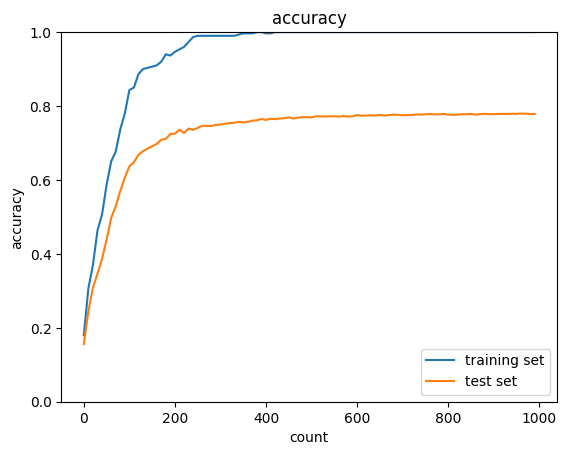

In [4]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.31666666666666665
                : 10. 正答率(テスト) = 0.2327
Generation: 20. 正答率(トレーニング) = 0.46
                : 20. 正答率(テスト) = 0.3037
Generation: 30. 正答率(トレーニング) = 0.5533333333333333
                : 30. 正答率(テスト) = 0.3716
Generation: 40. 正答率(トレーニング) = 0.6033333333333334
                : 40. 正答率(テスト) = 0.415
Generation: 50. 正答率(トレーニング) = 0.6166666666666667
                : 50. 正答率(テスト) = 0.4376
Generation: 60. 正答率(トレーニング) = 0.6333333333333333
                : 60. 正答率(テスト) = 0.4646
Generation: 70. 正答率(トレーニング) = 0.6866666666666666
                : 70. 正答率(テスト) = 0.4942
Generation: 80. 正答率(トレーニング) = 0.7033333333333334
                : 80. 正答率(テスト) = 0.5283
Generation: 90. 正答率(トレーニング) = 0.7333333333333333
                : 90. 正答率(テスト) = 0.5434
Generation: 100. 正答率(トレーニング) = 0.7666666666666667
                : 100. 正答率(テスト) = 0.5749
Generation: 110. 正答率(トレーニング) = 0.8133333333333334
                : 110. 正答率(テスト) = 0.6033
Generation: 120. 正答率(

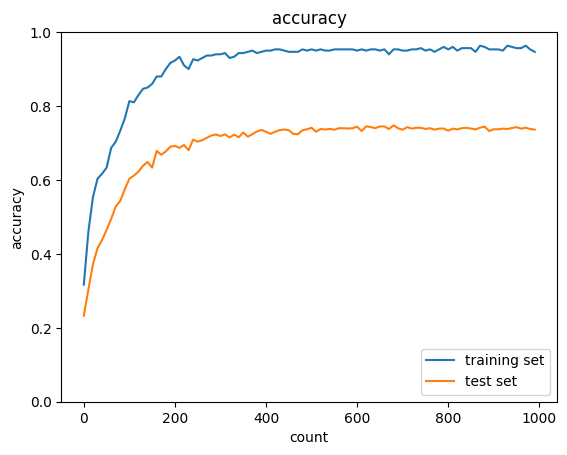

In [5]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5333333333333333
                : 10. 正答率(テスト) = 0.3489
Generation: 20. 正答率(トレーニング) = 0.5633333333333334
                : 20. 正答率(テスト) = 0.4192
Generation: 30. 正答率(トレーニング) = 0.63
                : 30. 正答率(テスト) = 0.4829
Generation: 40. 正答率(トレーニング) = 0.8466666666666667
                : 40. 正答率(テスト) = 0.6706
Generation: 50. 正答率(トレーニング) = 0.8133333333333334
                : 50. 正答率(テスト) = 0.6381
Generation: 60. 正答率(トレーニング) = 0.37666666666666665
                : 60. 正答率(テスト) = 0.3053
Generation: 70. 正答率(トレーニング) = 0.8966666666666666
                : 70. 正答率(テスト) = 0.7182
Generation: 80. 正答率(トレーニング) = 0.8033333333333333
                : 80. 正答率(テスト) = 0.6153
Generation: 90. 正答率(トレーニング) = 0.5466666666666666
                : 90. 正答率(テスト) = 0.4735
Generation: 100. 正答率(トレーニング) = 0.8533333333333334
                : 100. 正答率(テスト) = 0.669
Generation: 110. 正答率(トレーニング) = 0.89
                : 110. 正答率(テスト) = 0.6929
Generation: 120. 正答率(トレーニング) = 0.58

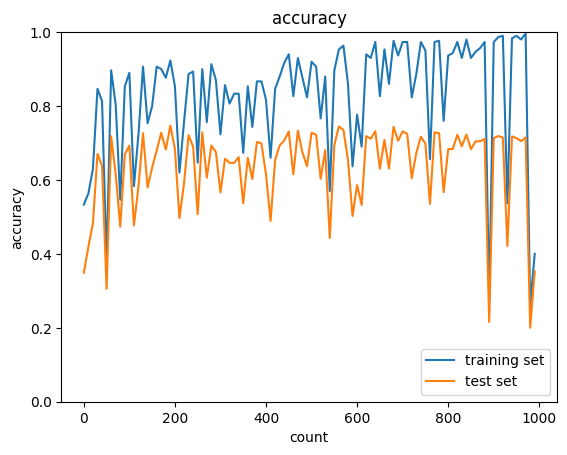

In [6]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [7]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0669
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.0677
Generation: 30. 正答率(トレーニング) = 0.10333333333333333
                : 30. 正答率(テスト) = 0.082
Generation: 40. 正答率(トレーニング) = 0.14666666666666667
                : 40. 正答率(テスト) = 0.0953
Generation: 50. 正答率(トレーニング) = 0.15
                : 50. 正答率(テスト) = 0.1014
Generation: 60. 正答率(トレーニング) = 0.16
                : 60. 正答率(テスト) = 0.1195
Generation: 70. 正答率(トレーニング) = 0.15333333333333332
                : 70. 正答率(テスト) = 0.1264
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.1297
Generation: 90. 正答率(トレーニング) = 0.15
                : 90. 正答率(テスト) = 0.1352
Generation: 100. 正答率(トレーニング) = 0.17
                : 100. 正答率(テスト) = 0.1446
Generation: 110. 正答率(トレーニング) = 0.17
                : 110. 正答率(テスト) = 0.1554
Generation: 120. 正答率(トレーニング) = 0.2
                : 120. 正答率(テスト) = 0.176
Generation: 130. 正答率(トレーニング) = 0.2
       

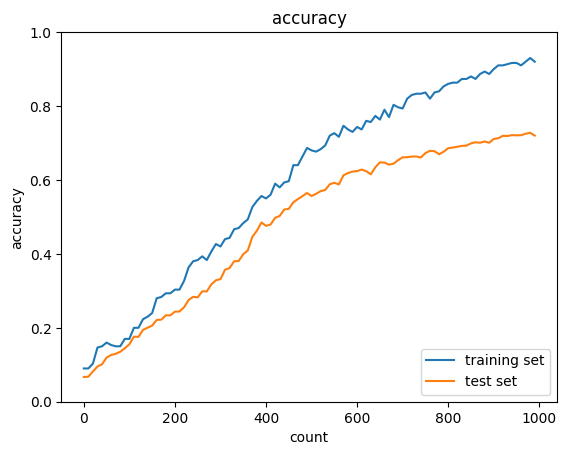

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1431
Generation: 20. 正答率(トレーニング) = 0.22
                : 20. 正答率(テスト) = 0.1825
Generation: 30. 正答率(トレーニング) = 0.25666666666666665
                : 30. 正答率(テスト) = 0.2177
Generation: 40. 正答率(トレーニング) = 0.30333333333333334
                : 40. 正答率(テスト) = 0.2498
Generation: 50. 正答率(トレーニング) = 0.35333333333333333
                : 50. 正答率(テスト) = 0.278
Generation: 60. 正答率(トレーニング) = 0.39
                : 60. 正答率(テスト) = 0.3065
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.3118
Generation: 80. 正答率(トレーニング) = 0.43333333333333335
                : 80. 正答率(テスト) = 0.3372
Generation: 90. 正答率(トレーニング) = 0.4533333333333333
                : 90. 正答率(テスト) = 0.355
Generation: 100. 正答率(トレーニング) = 0.49
                : 100. 正答率(テスト) = 0.371
Generation: 110. 正答率(トレーニング) = 0.49
                : 110. 正答率(テスト) = 0.3792
Generation: 120. 正答率(トレーニング) = 0.5
                : 120. 正答率(テスト) = 0.3795
Generation: 130

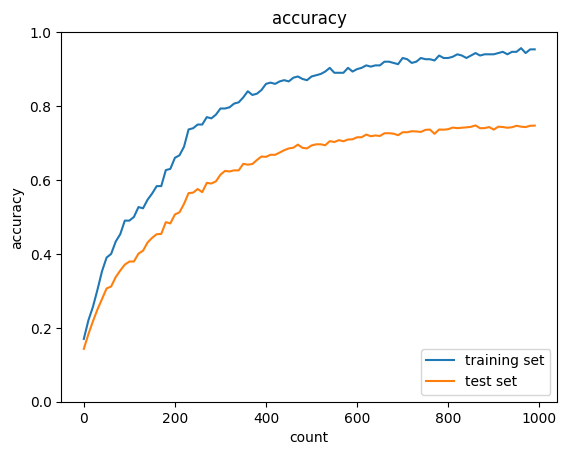

In [9]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()